# Moving Average (MA) Model

This notebook implements a Moving Average (MA) model for time series analysis and forecasting. The objective is to predict future values of a target variable by modeling the dependency on the past forecast errors.

The steps involved include:

- **Data Preprocessing**: Preparing the dataset for analysis.
- **Stationarity Testing**: Using the Dickey-Fuller test to check if the time series is stationary.
- **Model Fitting**: Applying the MA model to identify patterns in the residual errors of the time series.
- **Forecasting**: Using the model to predict future values based on past forecast errors.
- **Evaluation**: Comparing the predicted values with the actual data to assess model performance.

The focus is on leveraging the error term of the time series to build a reliable model for accurate forecasting.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1 & 2: Loading the Dataset and Identifying Time Series Columns

I began by preparing the dataset and identifying the key columns for time series analysis and forecasting:

### Step 1: Loading the Dataset
- I used the `pandas` library to load the dataset from an Excel file located at `'../datasets/master_dataset/master_dataset.xlsx'`.
- The dataset was stored in the variable `data` for further processing and analysis.

### Step 2: Identifying Numeric Time Series Columns
- I selected the following numeric columns from the dataset for time series analysis:
  - **Clicks**: Represents the number of clicks recorded over time.
  - **Impressions**: Represents the number of impressions generated over time.
  - **Quantity**: Represents the quantity values over time, which is the primary target variable for forecasting.
- These columns were stored in a list called `time_series_columns` to enable easy iteration and analysis in subsequent steps.


In [2]:
# Step 1: Load the dataset
data = pd.read_excel('../datasets/master_dataset/master_dataset.xlsx')

# Step 2: Identify numeric time series columns
time_series_columns = ["Clicks", "Impressions", "Quantity"]

# Steps 3 to 9: Performing Moving Average Analysis

In this section, I analyzed each numeric time series column, applied the Moving Average (MA) model, and forecasted future values.

### Step 3: Looping Through Each Time Series Column
- I iterated over the list of time series columns (`Clicks`, `Impressions`, and `Quantity`) to perform the analysis for each column individually.
- For each column:
  - I removed any missing values using `.dropna()` to ensure clean data for analysis.
  - I displayed the first 5 rows of the column to understand its structure.

### Step 4: Visualizing the Time Series
- I plotted the time series data for each column to observe trends and patterns.
- The x-axis represents the `Day Index`, while the y-axis represents the respective column's values.
- This visualization helps identify the overall behavior of the data over time.

### Step 5: Checking Stationarity with the Dickey-Fuller Test
- I performed the **Augmented Dickey-Fuller (ADF) Test** to check if the time series is stationary:
  - If the `p-value` was greater than 0.05, I applied **differencing** to make the series stationary by computing the difference between consecutive values.
  - If the `p-value` was less than or equal to 0.05, I concluded the series was stationary, and no differencing was needed.
- For non-stationary data:
  - I displayed the first 5 rows of the differenced series for verification.

### Step 6: Applying the Moving Average (MA) Model
- I applied a **Moving Average** to the time series:
  - A `window_size` of 3 was used to calculate a 3-step moving average, which smoothens the data by averaging consecutive values within a window of size 3.
  - I displayed the first 5 rows of the moving average for validation.

### Step 7: Visualizing the Moving Average
- I visualized the moving average along with the original time series data:
  - The original series was plotted in blue, while the moving average was plotted in orange.
  - This visualization helps compare the smoothed series with the original data to identify patterns more clearly.

### Step 8: Forecasting Future Values
- I forecasted the next 5 values for each column using the Moving Average model:
  - The forecast was calculated as the simple mean of the last 3 values of the moving average.
  - The forecasted values were displayed as a list for clarity.

### Step 9: Displaying Forecast Results
- I plotted the forecasted values alongside the original time series:
  - The original data was plotted in blue, while the forecasted values were plotted in red.
  - This visualization demonstrates how well the model predicts future values based on the moving average.

### Summary
Through this block of code, I analyzed each column of the time series dataset, applied the Moving Average model, and forecasted future values. This process smoothens the data, highlights patterns, and provides actionable insights for time series forecasting.



*** Analyzing column: Clicks ***

First 5 rows of Clicks:
 0    445
1    433
2    424
3    427
4    451
Name: Clicks, dtype: int64


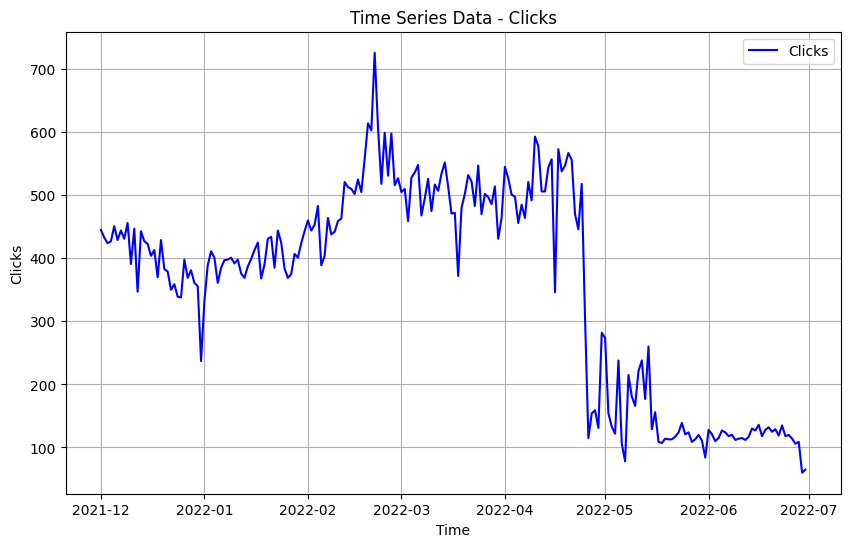

Dickey-Fuller Test Statistic: -0.8705717270828215
p-value: 0.797509057499528
The column: Clicks is non-stationary. Applying differencing...

First 5 rows of differenced Clicks:
 1   -12.0
2    -9.0
3     3.0
4    24.0
5   -22.0
Name: Clicks, dtype: float64

First 5 rows of Moving Average for Clicks:
 1         NaN
2         NaN
3   -6.000000
4    6.000000
5    1.666667
Name: Clicks, dtype: float64


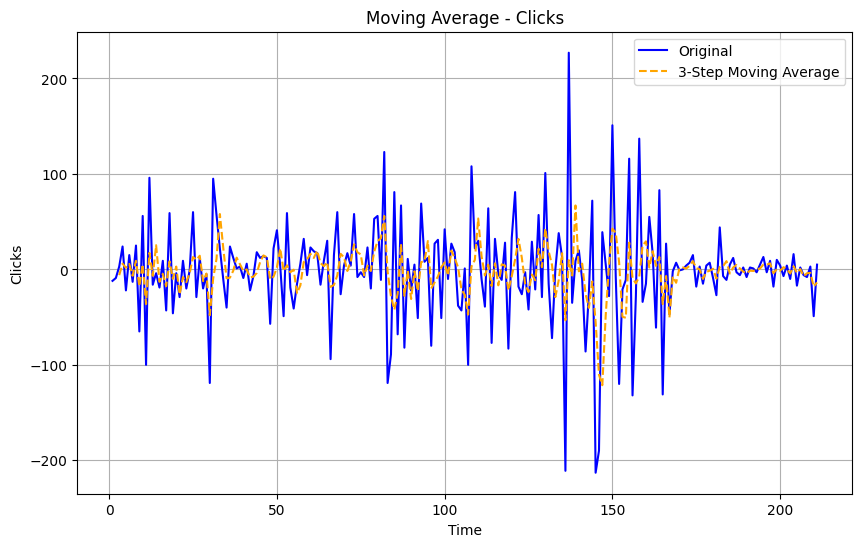


Forecasted Values for Clicks:
 [np.float64(-11.777777777777779), np.float64(-11.777777777777779), np.float64(-11.777777777777779), np.float64(-11.777777777777779), np.float64(-11.777777777777779)]


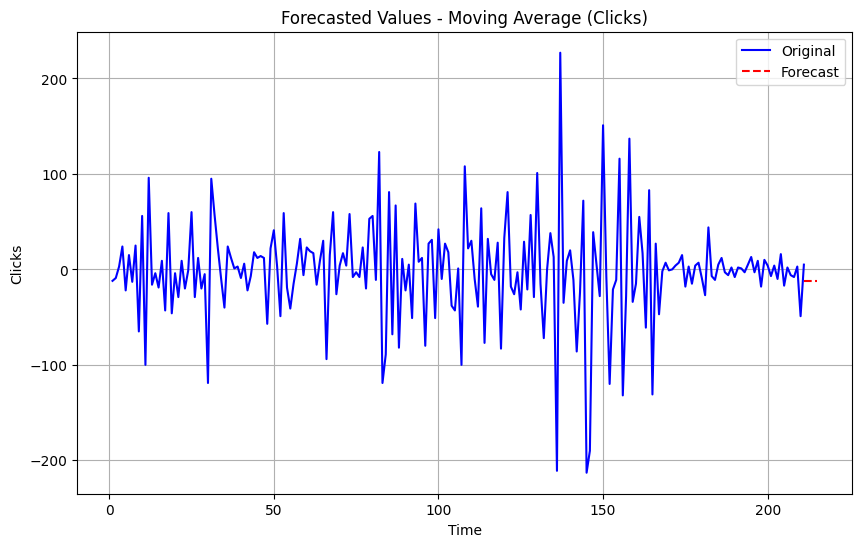


*** Analyzing column: Impressions ***

First 5 rows of Impressions:
 0    620
1    890
2    851
3    881
4    678
Name: Impressions, dtype: int64


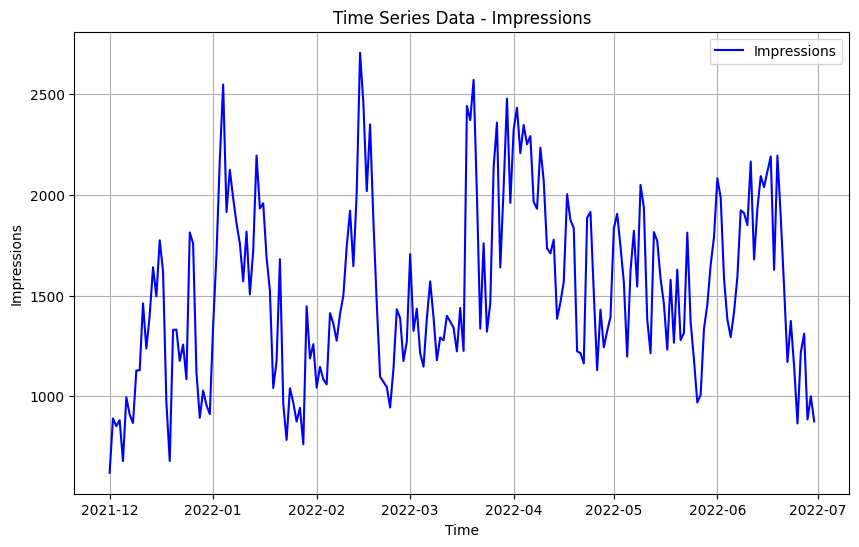

Dickey-Fuller Test Statistic: -5.6962061101258685
p-value: 7.863580125889645e-07
Impressions is stationary.

First 5 rows of Moving Average for Impressions:
 0           NaN
1           NaN
2    787.000000
3    874.000000
4    803.333333
Name: Impressions, dtype: float64


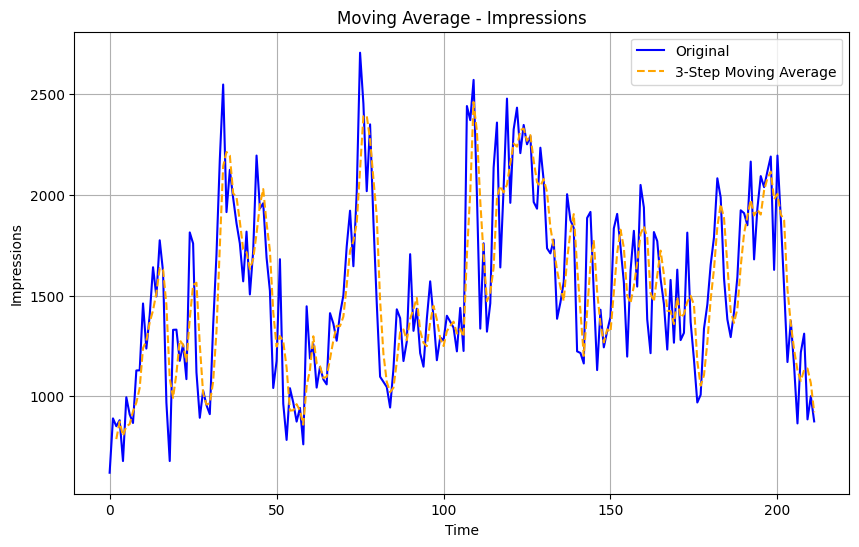


Forecasted Values for Impressions:
 [np.float64(1041.111111111111), np.float64(1041.111111111111), np.float64(1041.111111111111), np.float64(1041.111111111111), np.float64(1041.111111111111)]


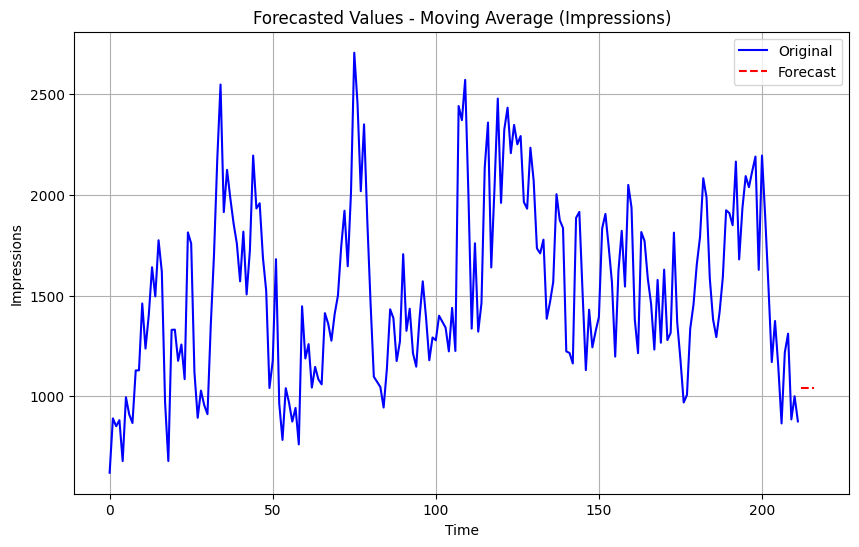


*** Analyzing column: Quantity ***

First 5 rows of Quantity:
 0    14
1    10
2    13
3    22
4    33
Name: Quantity, dtype: int64


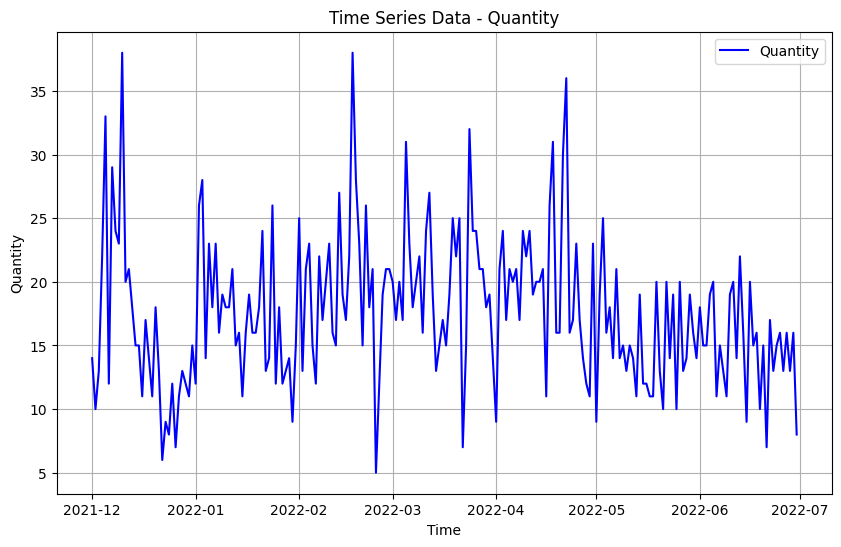

Dickey-Fuller Test Statistic: -4.445717448758575
p-value: 0.00024615679644112006
Quantity is stationary.

First 5 rows of Moving Average for Quantity:
 0          NaN
1          NaN
2    12.333333
3    15.000000
4    22.666667
Name: Quantity, dtype: float64


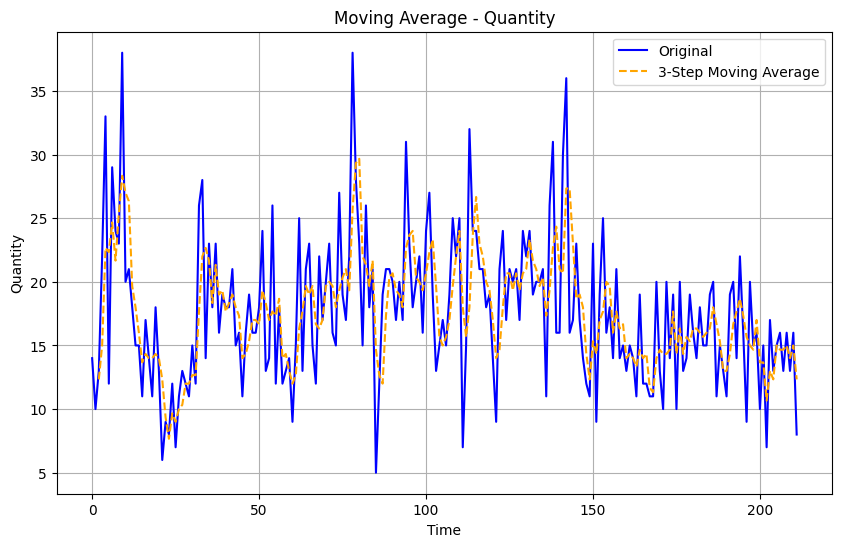


Forecasted Values for Quantity:
 [np.float64(13.777777777777779), np.float64(13.777777777777779), np.float64(13.777777777777779), np.float64(13.777777777777779), np.float64(13.777777777777779)]


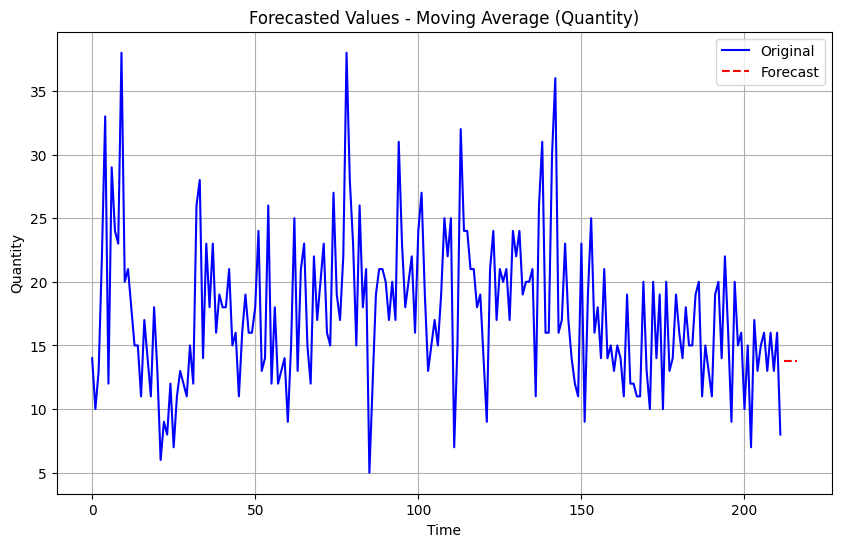

In [3]:
# Step 3: Loop through each column to conduct Moving Average Analysis
for column in time_series_columns:
    print(f"\n*** Analyzing column: {column} ***")
    time_series = data[column].dropna()  # To remove the missing values

    # Display first few rows of the data
    print(f"\nFirst 5 rows of {column}:\n", time_series.head())

    # Step 4: Visualize the time series
    plt.figure(figsize=(10, 6))
    plt.plot(data["Day Index"], time_series, label=column, color="blue")
    plt.title(f"Time Series Data - {column}")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

    # Step 5: Checking stationarity using the Dickey-Fuller test
    adf_test = adfuller(time_series)
    print(f"Dickey-Fuller Test Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")

    if adf_test[1] > 0.05:
        print(f"The column: {column} is non-stationary. Applying differencing...")
        time_series_diff = time_series.diff().dropna()  # Difference the series

        # Display first 5 rows of differenced series
        print(f"\nFirst 5 rows of differenced {column}:\n", time_series_diff.head())
    else:
        print(f"{column} is stationary.")
        time_series_diff = time_series

    # Step 6: Apply Moving Average
    window_size = 3  # Define the window size for moving average
    moving_avg = time_series_diff.rolling(window=window_size).mean()

    # Display first 5 rows of moving average
    print(f"\nFirst 5 rows of Moving Average for {column}:\n", moving_avg.head())

    # Step 7: Visualize the Moving Average with the original time series
    plt.figure(figsize=(10, 6))
    plt.plot(time_series_diff, label="Original", color="blue")
    plt.plot(moving_avg, label=f"{window_size}-Step Moving Average", color="orange", linestyle="--")
    plt.title(f"Moving Average - {column}")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

    # Step 8: Forecast future values using Moving Average
    forecast_steps = 5  # Number of steps to forecast
    forecast = moving_avg.iloc[-window_size:].mean()  # Simple average of the last few values
    forecast_values = [forecast] * forecast_steps

    print(f"\nForecasted Values for {column}:\n", forecast_values)

    # Step 9: Display forecast results
    future_index = range(len(time_series_diff), len(time_series_diff) + forecast_steps)
    plt.figure(figsize=(10, 6))
    plt.plot(time_series_diff, label="Original", color="blue")
    plt.plot(future_index, forecast_values, label="Forecast", color="red", linestyle="--")
    plt.title(f"Forecasted Values - Moving Average ({column})")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()